In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

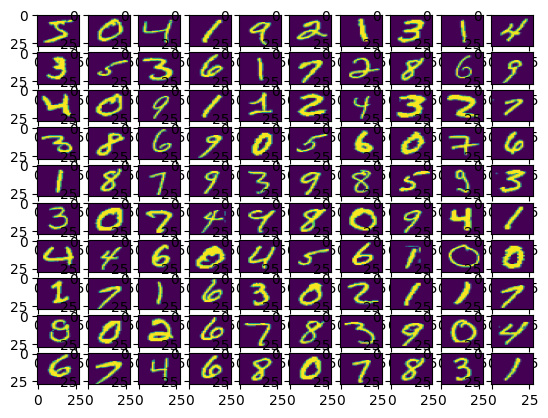

In [5]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='sigmoid'),  
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    tf.keras.layers.Dense(10, activation='softmax'),
])

/Users/jokello/Projects/DS/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
mod = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
print(mod)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8797 - loss: 0.4317 - val_accuracy: 0.9398 - val_loss: 0.2065
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9478 - loss: 0.1764 - val_accuracy: 0.9592 - val_loss: 0.1402
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9640 - loss: 0.1192 - val_accuracy: 0.9605 - val_loss: 0.1325
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9740 - loss: 0.0849 - val_accuracy: 0.9692 - val_loss: 0.1022
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9801 - loss: 0.0645 - val_accuracy: 0.9730 - val_loss: 0.0910
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9856 - loss: 0.0476 - val_accuracy: 0.9749 - val_loss: 0.0854
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9892 - loss: 0.0365 - val_accuracy: 0.9742 - val_loss: 0.0862
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9917 - loss: 0.0

In [9]:
results = model.evaluate(x_test, y_test)
print("Test Loss, Test Accuracy:", results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9772 - loss: 0.0780
Test Loss, Test Accuracy: [0.07803542166948318, 0.9771999716758728]


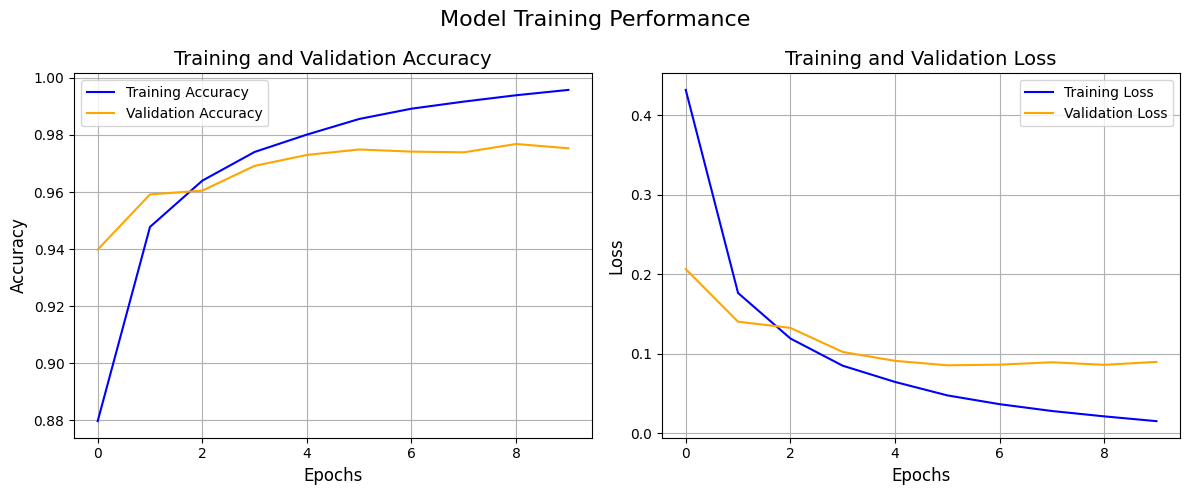

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mod.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(mod.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(mod.history['loss'], label='Training Loss', color='blue')
plt.plot(mod.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

Recurrent Neural Network in Action

In [24]:
rnn_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(28, 28), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
rnn_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
rnn_mod = rnn_model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 45ms/step - accuracy: 0.8761 - loss: 0.3921 - val_accuracy: 0.9622 - val_loss: 0.1355
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9669 - loss: 0.1150 - val_accuracy: 0.9754 - val_loss: 0.0837
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9772 - loss: 0.0786 - val_accuracy: 0.9829 - val_loss: 0.0585


In [27]:
results = rnn_model.evaluate(x_test, y_test)
print("Test Loss, Test Accuracy:", results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9829 - loss: 0.0585
Test Loss, Test Accuracy: [0.05849457532167435, 0.9829000234603882]


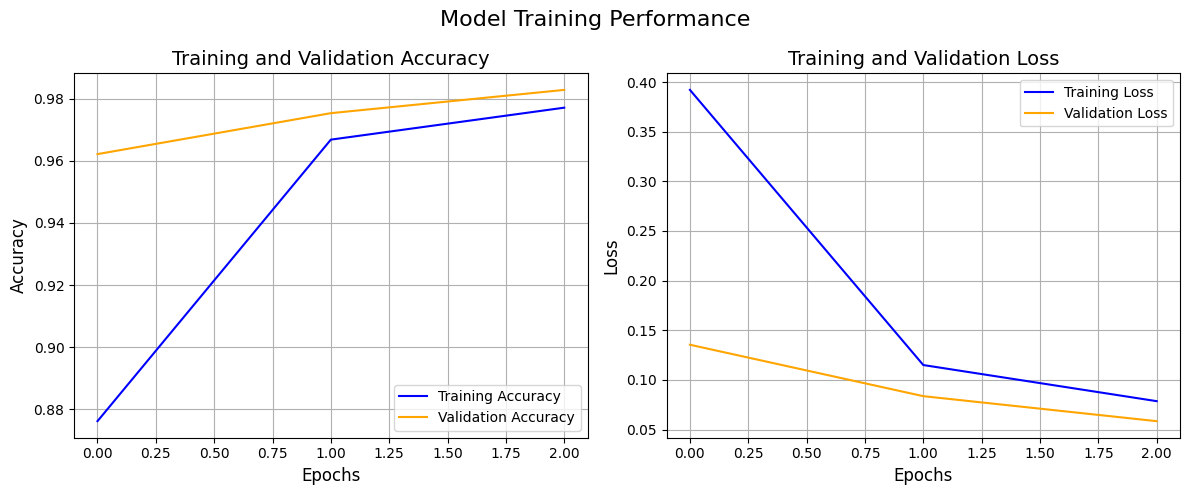

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rnn_mod.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(rnn_mod.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(rnn_mod.history['loss'], label='Training Loss', color='blue')
plt.plot(rnn_mod.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()